In [1]:
# Real Imports
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
# import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from datetime import datetime

import keras
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

from keras.models import Sequential
from keras.layers import *
# from keras.optimizers import SGD
import keras.utils
from keras import utils as np_utils
keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
# from keras.layers import Dense, Dropout, Activation
# from keras.optimizers import SGD



PATH = os.path.join(os.path.dirname('/users/u27/greco/memes/AllData'), 'AllData')

# parse through the folder through every file    

Using TensorFlow backend.


In [2]:
train_dir = os.path.join(PATH, 'Train/')
val_dir = os.path.join(PATH, 'Validate/')

train_blb_dir = os.path.join(train_dir, 'TrainBadLBri')  # directory with training set of BadLuckBrian
train_dbf_dir = os.path.join(train_dir, 'TrainDisBf')  # directory with training set of DisloyalBoyfriend
train_htp_dir = os.path.join(train_dir, 'TrainHideTPain')  # directory with training set of HideThePain
train_sb_dir = os.path.join(train_dir, 'TrainSponge')  # directory with training set of Spongebob
train_tb_dir = os.path.join(train_dir, 'TrainTwoBt')  # directory with training set of TwoButtons

val_blb_dir = os.path.join(val_dir, 'ValBadLBri')  # directory with validating set of BadLuckBrian
val_dbf_dir = os.path.join(val_dir, 'ValDisBf')  # directory with validating set of DisloyalBoyfriend
val_htp_dir = os.path.join(val_dir, 'ValHideTPain')  # directory with validating set of HideThePain
val_sb_dir = os.path.join(val_dir, 'ValSponge')  # directory with validating set of Spongebob
val_tb_dir = os.path.join(val_dir, 'ValTwoBt')  # directory with validating set of TwoButtons

num_blb_tr = len(os.listdir(train_blb_dir))
num_dbf_tr = len(os.listdir(train_dbf_dir))
num_htp_tr = len(os.listdir(train_htp_dir))
num_sb_tr = len(os.listdir(train_sb_dir))
num_tb_tr = len(os.listdir(train_tb_dir))

num_blb_val = len(os.listdir(val_blb_dir))
num_dbf_val = len(os.listdir(val_dbf_dir))
num_htp_val = len(os.listdir(val_htp_dir))
num_sb_val = len(os.listdir(val_sb_dir))
num_tb_val = len(os.listdir(val_tb_dir))

total_train = num_blb_tr + num_dbf_tr + num_htp_tr + num_sb_tr + num_tb_tr
total_val = num_blb_val + num_dbf_val + num_htp_val + num_sb_val + num_tb_val

In [3]:
print("BLB training set: ", num_blb_tr)
print("DBF training set: ", num_dbf_tr)
print("HTP training set: ", num_htp_tr)
print("SB training set: ", num_sb_tr)
print("TB training set: ", num_tb_tr)

print("\n\n")

print("BLB Validation set: ", num_blb_val)
print("DBF Validation set: ", num_dbf_val)
print("HTP Validation set: ", num_htp_val)
print("SB Validation set: ", num_sb_val)
print("TB Validation set: ", num_tb_val)

print("\n\n")

print("Total Training: ", total_train)
print("Total Validation: ", total_val)

BLB training set:  2931
DBF training set:  2954
HTP training set:  1816
SB training set:  1122
TB training set:  2921



BLB Validation set:  733
DBF Validation set:  739
HTP Validation set:  454
SB Validation set:  281
TB Validation set:  730



Total Training:  11744
Total Validation:  2937


In [14]:
batch_size = 128
epochs = 1
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [15]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [16]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 11744 images belonging to 5 classes.


In [17]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=val_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 2937 images belonging to 5 classes.


In [18]:
sample_training_images, _ = next(train_data_gen)

In [19]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

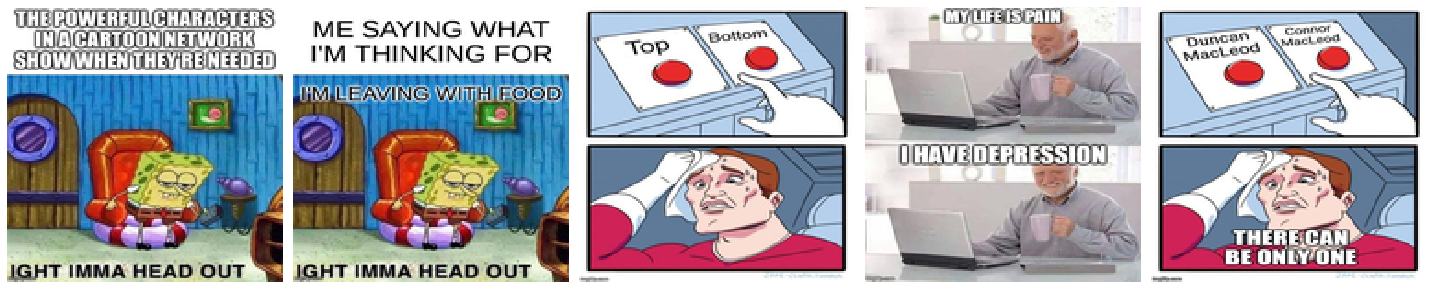

In [20]:
plotImages(sample_training_images[:5])

In [21]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation= 'softmax')
])

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [23]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/1
91/91 [==============================] - 55s 603ms/step - loss: 0.0857 - accuracy: 0.9719 - val_loss: 5.2028e-04 - val_accuracy: 0.9989


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [27]:
prediction = "/users/u27/greco/memes/use/"

image_generator = DirectoryIterator(directory=prediction, target_size=(150,150), batch_size=1)

# image_generatorge_generator.

hello = model.predict(image_generator)

# train_data_gen = train_image_generator.flow_from_directory(batch_size=2,
#                                                            directory=prediction,
#                                                            shuffle=False,
#                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                            class_mode='categorical')
print(hello)

NameError: name 'DirectoryIterator' is not defined

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [ ]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [ ]:
plotImages(augmented_images)

In [ ]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [52]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 11744 images belonging to 5 classes.


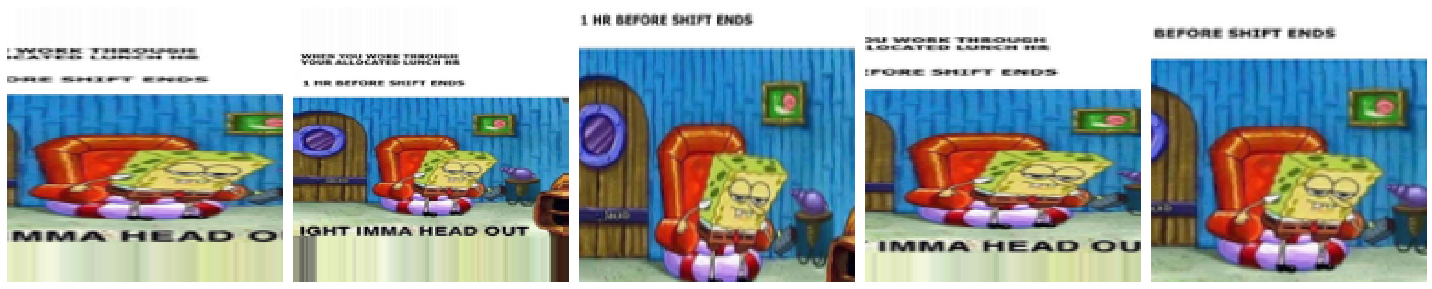

In [53]:
plotImages(augmented_images)

In [54]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [55]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

Found 11744 images belonging to 5 classes.


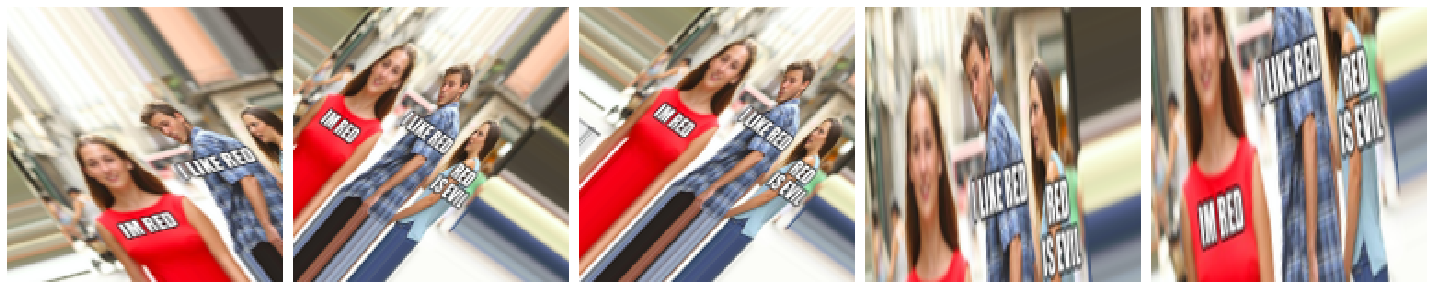

In [56]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [57]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [58]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical') # categorical_crossentropy

Found 2937 images belonging to 5 classes.


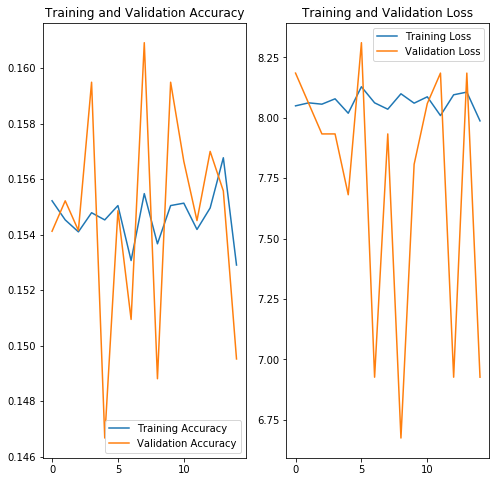

In [59]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'), #change last one to softmax
    Dense(1)
])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
model_new.compile(optimizer='SGD',
                  loss=tf.keras.losses.categorical_crossentropy(from_logits=True),
                  metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy', 'categorical_accuracy'])
# model.compile(loss=customLoss, optimizer='SGD', metrics=['accuracy', 'categorical_accuracy'])


model_new.summary()

TypeError: categorical_crossentropy() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [ ]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# print(model(r'/home/greco/Documents/Memev2/PersonalTestsResize/20200209-070152-411881.jpeg'))

!pip install -q pyyaml h5py --user

model.save('my_meme_model.h5') 

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_meme_model.h5')

# Show the model architecture
new_model.summary()

In [ ]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# print(model(r'/home/greco/Documents/Memev2/PersonalTestsResize/20200209-070152-411881.jpeg'))

!pip install -q pyyaml h5py --user

model.save('my_meme_model.h5') 

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_meme_model.h5')

# Show the model architecture
new_model.summary()

In [ ]:
# use the trained model and plug in a test image
#output: what meme it is

# answer = mz

# prediction = my_meme_model.h5.predict(__file__)



In [ ]:

# from PIL import Image

# myImage = Image.open(r'/home/greco/Documents/Memev2/PersonalTestsResize/20200209-070152-411881.jpeg')

# myImage.show()


In [ ]:
# train_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# train_dir = '/home/greco/Documents/Memev2/PersonalTestsResize/'

# train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
#                                                            directory=train_dir,
#                                                            shuffle=True,
#                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                            class_mode='binary')

In [ ]:
# !pip install tensorflow_hub --user
# import tensorflow_hub as hub
# # detector = hub.load(model_new)

In [ ]:
# !pip install opencv-python --user

# #!pip install cv
# import cv2

# CATEGORIES = ["SpongeBob", "Change My Mind"]

# imgg = cv2.imread('path.tif', 1)

# model_new.summary()

# def format_example(myImage, label):
#   myImage = tf.cast(image, tf.float32)
#   image = (myImage/255) - 1
#   image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
#   return image, label
# print(format_example)

# # def prepare(filepath):
# #     IMG_SIZE = 70  # 50 in txt-based
# # #     imgg = cv2.imread('path.tif', 1)
# #     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

# prediction = model.predict(train_dir)
# print(prediction)  # will be a list in a list.
# print(CATEGORIES[int(prediction[0][0])])

In [ ]:
# predictionFinal = model_new.predict(myImage)

# print(predictionFinal)